# Old Classical Physics code
#### Nathan Hancock
#### u6956155

1) Construct an algorithm to integrate the dual vortex equation (1) forward in time with an initial x and y coordinate

Due to the type of system, a numerical model can be used to make integration simple. The main process centres around the general idea of a numerical model where when a small time step dt over a time interval is small enough, the path can be modeled using:

$$x_{t+dt} = x_t + \frac{dx}{dt}|_t*dt$$

The model for the first problem is a funtion of x and y velocity denoted by u and v respectively. The functions of these two velocities are

$$ u = -\frac{\alpha y}{(x-\beta)^2+y^2} - \frac{\alpha y}{(x+\beta)^2+y^2} \space \space (1)$$
$$ v = \frac{\alpha (x-\beta)}{(x-\beta)^2+y^2} + \frac{\alpha (x+\beta)}{(x+\beta)^2+y^2} \space \space (2)$$

Alpha and beta are two constants which are the vorticies paramters, where $\beta$ determines the x position of to vorticies. For the numerical model, the derivative can be written as

$$u(x,y,t) = \frac{dx}{dt}|_t   \space \space \space    v(x,y,t) = \frac{dy}{dt}|_t \space \space \space (3)$$

In [273]:
#Import neccessary packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The first step is to define a function that calculates the velocity from equations (1) and (2). Calculate_velocity takes a fixed $\alpha$ and $\beta$ value and calculates the velocity at a given x and y. This function will be placed inside the numerical models later to calculate the velocity at each time step

In [274]:
def calculate_velocity(alpha, beta, x, y):
    u = - alpha*y/((x-beta)**2 + y**2) - alpha*y/((x+beta)**2 + y**2)      #velocity in x direction, equation (1)
    v = alpha*(x-beta)/((x-beta)**2 + y**2)+alpha*(x+beta)/((x+beta)**2 + y**2)  #velocity in y direction, equation (2)
    return u,v  #returns a given x and y velocity at a given x and y

To test this function, the np.linspace function creates an array of x and y values which can be inputted with an $\alpha$ and $\beta$ value which can be plotted using the plt.streamplot function. For the plot below, the streamplot was done with $\alpha = \beta = 0.5$

Text(0.5, 1.0, 'Test of equations of motion with alpha=beta=0.5')

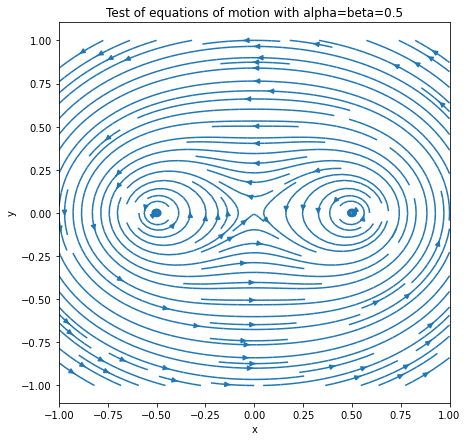

In [275]:
y = np.linspace(-1,1,200)   #creates x array
x = np.linspace(-1,1,200)   #creates y array
X,Y = np.meshgrid(x,y)      #Array for velocity calculation

u,v = calculate_velocity(0.5,0.5,X,Y)

plt.figure(figsize=(7,7))   #adjusts the figure size to make it easier to view
plt.streamplot(x,y,u,v,density=1.5)  #plots streamlines of u and v. Density determines the total number of streamlines plotted
                                     #Larger number leads to more lines plotted
plt.xlim([-1, 1])     #limits size of plot to [-1,1]
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test of equations of motion with alpha=beta=0.5')

Now that the velocity function is defined, it can then be inputted into the numerical model. odestep takes forms a path of the fluid from an initial position xinit and yinit. The model will then form this path over a total time denoted $time$ with individual time steps dt.

The main function centers around a for loop which runs over the length of nt. nt creates a integer for the number of time steps that are in the total time provided. the range() function on nt will tell the for loop to repeat for specifically the number of steps with in $time$.

With each step, the x and y values are updated using (3), or specifically the previously defined calculate_velocity() function, and each value is tabulated into a table to be plotted.

For the rest of the plots, the $\alpha$ and $\beta$ values will be kept at 0.5

In [276]:
def odestep(xinit, yinit, time, dt):
    nt = int(time/dt)       #returns an integer value for the total number of time steps in time
    x=np.append([],xinit)   #Create a list for x and y and add the initial values to the start of the list
    y=np.append([],yinit)
    for i in range (nt):
        x0 = x[-1]     #updates the x and y positions for each step that will be inputted into the calculate_velocity function
        y0 = y[-1]     #by going to the end of the list, i.e. the recently added x and y value from the previous iteration
        t=i*dt         #adds a step in time for each iteration
        
        u,v = calculate_velocity(0.5, 0.5, x0, y0)   #calculates the velocity at aplha=beta=0.5
        
        x = np.append(x,x0+dt*u)     #updates the x and y positions using the calculated velocity at the x and y position and
        y = np.append(y,y0+dt*v)     #adds the values to the x and y tables for plotting later
        
    dtString = str(dt)      #converts the specific dt supplied so that it can be added to the legend for indentifying the
                            #different dt used
        
    plt.plot(x,y,linewidth=2,label='trajectory dt = '+dtString)  #plots the line of tabulated x and y values as a line
    plt.plot(xinit,yinit,'*',label='initial')                    #plots the initial position
    plt.plot(x[-1],y[-1],'o',label='final')                      #plots the final position

Using the numerical model, the function is used with three different time steps 0.001, 0.01 and 0.1. The different time steps show the limitations of the numerical model in that with larger time steps the model will deviate greatly from the streamlines. However, with small enough time steps, the model does show the rotational nature of the system

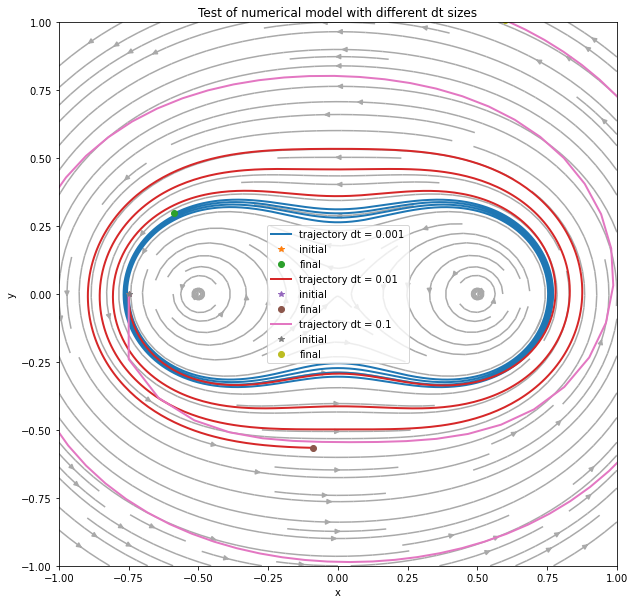

In [277]:
y = np.linspace(-1,1,200)   #creates x array
x = np.linspace(-1,1,200)   #creates y array
X,Y = np.meshgrid(x,y)      #Array for velocity calculation

u,v = calculate_velocity(0.5,0.5,X,Y)

plt.figure(figsize = (10,10))

plt.streamplot(x,y,u,v,density=1.5, color = 'darkgrey')
odestep(-0.75, 0, 10, 0.001)
odestep(-0.75, 0, 10, 0.01)
odestep(-0.75, 0, 10, 0.1)
plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test of numerical model with different dt sizes')
plt.legend()

Integrating the smallest timestep over a long time length of 40s provides the rotational nature of the system as seen below

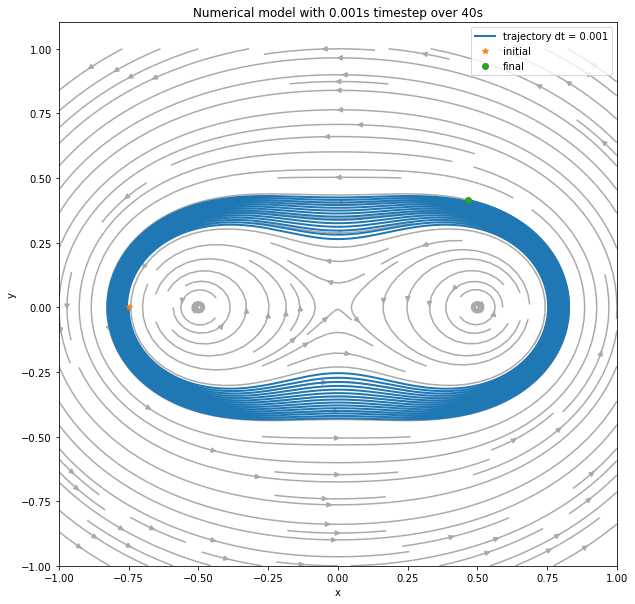

In [278]:
plt.figure(figsize = (10,10))

plt.streamplot(x,y,u,v,density=1.5, color = 'darkgrey')
odestep(-0.75, 0, 40, 0.001)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical model with 0.001s timestep over 40s')
plt.legend()

2) Determine the accuracy of the numerical model with different time steps

The streamfunction is an accurate way of giving a numerical value to the accuracy of the numerical model. The streamfunction $\psi$ is defined as

$$u = -\frac{\partial\psi}{\partial y} \space \space \space v = \frac{\partial\psi}{\partial x}$$

The streamfunction will be constant along any stream line, that is $\psi$ at one point will be constant at another point along the path taken defined by u and v. This will not be the case for the numerical model as the model will slowly move further out from the initial path and the rate at which it moves outwards is determined by the time step. Using the streamfunction, the differenc of $\psi$ at the start and end points will provide a numerical value to the innacuracy of the numerical model with the time step size used.

Solving for $\psi$, both differentials need to be integrated

$$u = -\frac{\partial\psi}{\partial y} $$

$$ \psi = -\int u dy $$

$$ \psi = \int \frac{\alpha y}{(x-\beta)^2+y^2} + \frac{\alpha y}{(x+\beta)^2+y^2}dy $$

Substitute for denominator

$$\psi = \int \frac{\alpha y}{u}dy + \int \frac{\alpha y}{m} dy$$

$$\frac{1}{2y}du = dy,  \frac{1}{2y}dm = dy$$

$$\psi = \frac{\alpha}{2}\ln(u) + \frac{\alpha}{2}\ln(m) + g(x)$$

$$\psi = \frac{\alpha}{2}\ln((x-\beta)^2+y^2) + \frac{\alpha}{2}\ln((x+\beta)^2+y^2) + g(x)$$



g(x) can be found by integrating the other expression:

$$ v = \frac{d\psi}{dx}$$

$$ \psi = \int v dx$$

$$\psi = \int \frac{\alpha (x-\beta)}{(x-\beta)^2+y^2} + \frac{\alpha (x+\beta)}{(x+\beta)^2+y^2} dx$$

Using mathematica to solve for psi

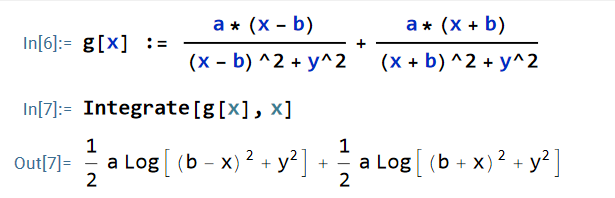

$$\psi = \frac{a}{2}\ln((b-x)^2+y^2) + \frac{\alpha}{2}\ln[(b+x)^2+y^2] + f(y)$$

From observation, f(y) and g(x) equal 0. Now that $\psi(x,y)$ is found, a function can be defined with given initial coordinates and return a numerical value for the innacuracy of the numerical model from 1. The psi function will be defined by psi() and the numerical accuracy will be defined as psiDifference given that psi is

$$\psi = \frac{a}{2}\ln((b-x)^2+y^2) + \frac{\alpha}{2}\ln[(b+x)^2+y^2] \space \space \space (4)$$

In [297]:
def psi(x, y, alpha, beta):
    psi = alpha/2*np.log((beta-x)**2+y**2)+alpha/2*np.log((beta+x)**2+y**2)
    return psi

def psiDifference(xinit, yinit, time, dt, alpha, beta):
    nt = int(time/dt)       #returns an integer value for the total number of time steps in time
    x=np.append([],xinit)   #Create a list for x and y and add the initial values to the start of the list
    y=np.append([],yinit)
    for i in range (nt):
        x0 = x[-1]     #updates the x and y positions for each step that will be inputted into the calculate_velocity function
        y0 = y[-1]     #by going to the end of the list, i.e. the recently added x and y value from the previous iteration
        t=i*dt         #adds a step in time for each iteration
        
        u,v = calculate_velocity(0.5, 0.5, x0, y0)   #calculates the velocity at aplha=beta=0.5
        
        x = np.append(x,x0+dt*u)     #updates the x and y positions using the calculated velocity at the x and y position and
        y = np.append(y,y0+dt*v)     #adds the values to the x and y tables for plotting later
    psi1 = psi(xinit, yinit, alpha, beta) #calculates initial psi value
    psi2 = psi(x[-1], y[-1], alpha, beta) #calculates end psi value
    
    deltaPsi = psi2-psi1  #calculates difference in psi. The smaller the difference, the more accurate the model
    
    timeDifferenceStr = str(dt)  #converts given time values and coordinates into strings to print
    totalTimeStr = str(time)     #the values in the end statement 
    xStr = str(xinit)
    yStr = str(yinit)
    
    print('The difference in psi for a total time integration of' + totalTimeStr + '  seconds with time steps of' +
         timeDifferenceStr + ' seconds with initial coordinates (' + xStr + ',' + yStr +') is', deltaPsi)

Now that the function is defined, it can be tested with different values. Specifically the three lines in plot 2 with initial position (-0.75, 0) and with time steps of 0.001, 0.01 and 0.1 over 10s

In [298]:
psiDifference(-0.75, 0, 10, 0.1, 0.5, 0.5)
psiDifference(-0.75, 0, 10, 0.01, 0.5, 0.5)
psiDifference(-0.75, 0, 10, 0.001, 0.5, 0.5)

The difference in psi for a total time integration of10  seconds with time steps of0.1 seconds with initial coordinates (-0.75,0) is 0.7875637326429967
The difference in psi for a total time integration of10  seconds with time steps of0.01 seconds with initial coordinates (-0.75,0) is 0.3017765974225305
The difference in psi for a total time integration of10  seconds with time steps of0.001 seconds with initial coordinates (-0.75,0) is 0.05316203774907624


As it is obvious, smaller time steps are more accurate of the actual path the fluid takes

3) Apply the numerical models to the blinking vortex system and calculate the finite time Lypanov exponent

The equation is two differential equations similar to the double votex equation from q1 and q2 but the $\beta$ is now time dependent. The blinking vortex is described by:

$$ u = -\frac{\alpha y}{(x-\beta(t))^2+y^2}\space \space\space (5)$$

$$v = \frac{\alpha(x- \beta(t))}{(x-\beta(t))^2+y^2}\space \space\space (6)$$

$$\beta(t) = \beta_0 \space sign[\sin(2\pi t)]\space \space\space (7)$$

The first step is to define a function that calculates the u and v at a given x, y and time. The $\alpha$ constant dictates the direction of flow and the $\beta_0$ constant dictates the centre of the vorticies at +/-$|\beta_0|$

In [287]:
def blinkingVortex(alpha, beta0,x, y, t):
    beta = beta0*np.sign(np.sin(2*np.pi*t))  #equation (). The value will alternate between +/-beta where the sign returns a 
                                             # +/-1 over any time t
    u = - alpha*y/((x-beta)**2 + y**2)    #calculates x velocity
    v = alpha*(x-beta)/((x-beta)**2 + y**2) #calculates y velocity
    return u,v

To test out the blinkingVortex function, a streamplot similar to Q1 is done at time t = 0.1 and t = 0.6 to produce both vorticies on the same plot. What the streamplot shows is that the vortex will change instantaneously between the positive and negative $\beta_0$ value over time

Text(0, 0.5, 'y')

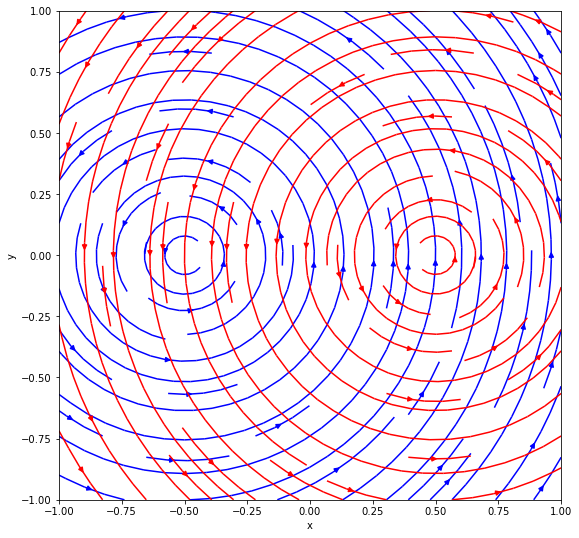

In [288]:
y = np.linspace(-1,1,200)
x = np.linspace(-1,1,200)
X,Y = np.meshgrid(x,y)

u,v = blinkingVortex(0.5,0.5,X,Y,0.6)
u1,v1 = blinkingVortex(0.5,0.5,X,Y,0.1)

plt.figure(figsize=(9,9))
plt.streamplot(x,y,u,v,density=0.8,color = 'b')
plt.streamplot(x,y,u1,v1,density=0.8, color = 'r')
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')

Now that the function for the movement is defined, it can now be implemented into a numerical function defined as blinkingStep function. The function plots the trajectory for a given x and y value and an alpha and beta value. Similar to previous parts, alpah=beta=0.5 for consitency but all functions are written with the ability for alpha and beta to be changed. The blinkingStep function will be slightly altered in blinkingStep2 for the lypanov calculation where instead of plotting the path, it returns the x and y values for the lypanov calculation.

In [289]:
def blinkingStep(xinit, yinit, time,  dt,alpha,beta0):
    nt = int(time/dt)    #creates an integer value for the time steps in the for loop
    x=np.append([],xinit) #list for x  and y values for plotting, adds chosen initial value to start of list
    y=np.append([],yinit)
    for i in range (nt):
        x0 = x[-1]  
        y0 = y[-1]#updates the x and y positions for each step that will be inputted into the calculate_velocity function
                  #by going to the end of the list, i.e. the recently added x and y value from the previous iteration
                  #adds a step in time for each iteration
        t=i*dt
        
        u,v = blinkingVortex(alpha, beta0, x0, y0,t)  #calculates velocity for current time step
        x = np.append(x,x0+dt*u)  #adds iterated x and y value to respective lists
        y = np.append(y,y0+dt*v)
    plt.plot(x,y,linewidth=2,label='trajectory')  #uses x and y values calculated and plots path
    plt.plot(xinit,yinit,'*',label='initial')
    plt.plot(x[-1],y[-1],'o',label='final')

This allows plotting of the path given a set of conditions. The code set below not only plots the two streamplots of the blinking vortex, but also two separate paths with different initial positions

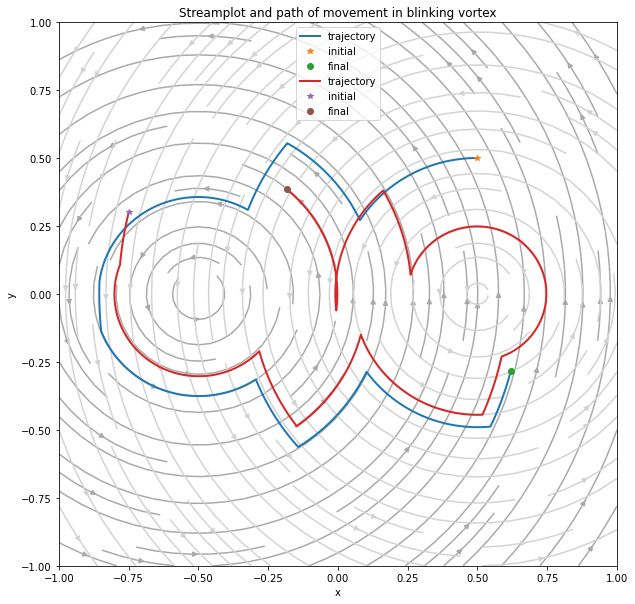

In [290]:
plt.figure(figsize = (10,10))     #makes the  plot larger for readability
u1,v1 = blinkingVortex(0.5,0.5,X,Y,0.9)    #calculates the velocity for each streamplot at different times
u2,v2 = blinkingVortex(0.5,0.5,X,Y,0.01)   

plt.streamplot(x,y,u1,v1,density=1, color = 'darkgrey')  #plots the streamplots of the vortex
plt.streamplot(x,y,u2,v2,density=1, color = 'lightgrey')
blinkingStep(0.5, 0.5, 5, 0.001, 0.5, 0.5)     #plots the path of two initial positions
blinkingStep(-0.75, 0.3, 5, 0.001, 0.5, 0.5)

plt.ylim([-1, 1])
plt.xlim([-1, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Streamplot and path of movement in blinking vortex')
plt.legend()

Using the blinkingStep function, blinkingStep2 instead of plotting returns the lists of x and y positions calculated. This function is used in the calculation of the lypanov exponent. The Lypanov exponent is a numerical value for how chaotic a system is and is a measure of the distance between the two paths with small difference in initial position. The finite time lypanov exponent is defined by

$$\lambda_i = \frac{1}{dt}*\ln\left(\frac{d(t_0+idt)}{d_0}\right) \space \space \space (8)$$

The $d_0$ is the initial distance between starting positions, $d(t)$ is the distance at time t which can be adjusted to $d(t+idt)$ for the numerical calculation. The line produced by plotting the individual lypanov exponent at time t against time, then the lypanov exponent should eventually approach a steady value, or the mean lypanov $\overline{\lambda}$

The lypanovExponent function does this calculation by first taking two initial positions, an alpha and beta value and a total time and time step. It will then use the initial conditions and imput them into blinkingStep2 to which produces the x and y values needed for the distance $d(t)$ calculation.

The calculated d values will then be inputted into the lypanov equation and inputted into a list for plotting

In [291]:
def blinkingStep2(xinit, yinit, alpha, beta0, time, dt):
    nt = int(time/dt)       #gives an integer value for total number of time steps
    x=np.append([],xinit)   #list of x and y values, adds given initial value to array
    y=np.append([],yinit)
    for i in range (nt):
        x0 = x[-1]         #makes current x and y value the last of the list
        y0 = y[-1]
        t=i*dt    #steps time forward 1 time step
        
        u,v = blinkingVortex(alpha, beta0, x0, y0,t)   #calculates velocity at specific time
        x = np.append(x,x0+dt*u)    #updates x and y values and adds them to the x and y list
        y = np.append(y,y0+dt*v)
    return x, y   #returns x and y value arrays

def lypanovExponent(x1init, y1init, x2init, y2init, alpha, beta0, t0, dt):
    nt = int(t0/dt)  #This little for loop is to get a list of time values that will be used for plotting
    timeList = [0]
    for i in range(nt):
        t=i*dt
        timeList.append(t)
        
    d0 = np.sqrt((x2init-x1init)**2+(y2init-y1init)**2)     #distance between two initial coordinates
    x1, y1 = blinkingStep2(x1init, y1init, alpha, beta0, t0, dt)  #gets the paths of the two initial conditions
    x2, y2 = blinkingStep2(x2init, y2init, alpha, beta0, t0, dt)
    
    d = np.sqrt((x2-x1)**2+(y2-y1)**2)   #calculates a list of distances between the two paths over time
    
    lypanov = 1/dt*np.log(d/d0)          #uses equation 8 to find the lypanov exponent at time t and forms a lypanov array
    
    plt.figure(figsize = (7,7))    #makes plot larger for easier reading
    coord1string = '(' + str(x1init) + ',' + str(y1init) + ')'
    coord2string = '(' + str(x2init) + ',' + str(y2init) + ')'
    
    plt.xlabel('time (s)')  #I wanted to automate the axis labels and titles but it doesnt want to work
    plt.ylabel('$\lambda$')
    plt.title('Lypanov exponent with initial coorinates' + coord1string + 'and' + coord2string)
    plt.plot(timeList, lypanov)
    
    
    

Testing the lypanov plots, 4 separate initial conditions around the vortex are chosen to test the plot. They are iterated over 200s with time steps of 0.001 (NOTE: the 200s is a bit much, if you want to run the code yourself and mess with different initial values, maybe lower the total time from 200 or increase the dt or else it may take 20 minutes to run. I made my PC run it for the 20 mins to see if it changed which is shown in the plot which is saved with the file.)

Text(0.5, 1.0, 'Lypanov exponent with initial coorinates (0.5, 0.51) and (0.5,0.5) with dt = 0.001')

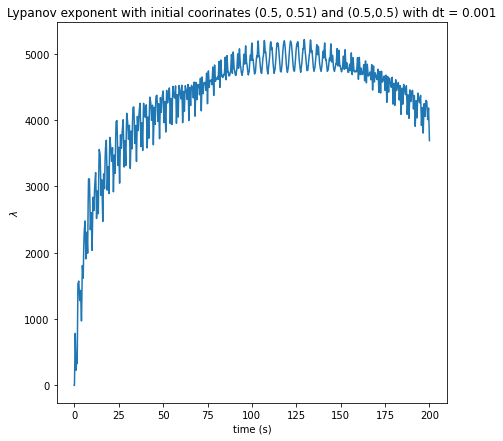

In [299]:
plt.figure(figsize = (7,7))
lypanovExponent2(0.5,0.51, 0.5, 0.5, 0.5, 0.5, 200, 0.001)
plt.xlabel('time (s)')
plt.ylabel('$\lambda$')
plt.title('Lypanov exponent with initial coorinates (0.5, 0.51) and (0.5,0.5) with dt = 0.001')

Text(0.5, 1.0, 'Lypanov exponent with initial coorinates (0.4, 0.41) and (0.4,0.4) with dt = 0.001')

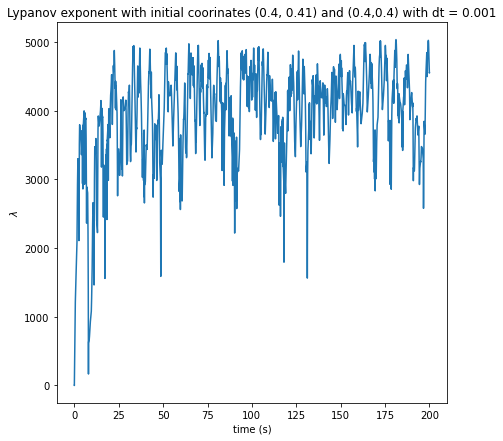

In [300]:
plt.figure(figsize = (7,7))
lypanovExponent2(0.4,0.41, 0.4, 0.4, 0.5, 0.5, 200, 0.001)
plt.xlabel('time (s)')
plt.ylabel('$\lambda$')
plt.title('Lypanov exponent with initial coorinates (0.4, 0.41) and (0.4,0.4) with dt = 0.001')

Text(0.5, 1.0, 'Lypanov exponent with initial coorinates (0.3, 0.31) and (0.3,0.3) with dt = 0.001')

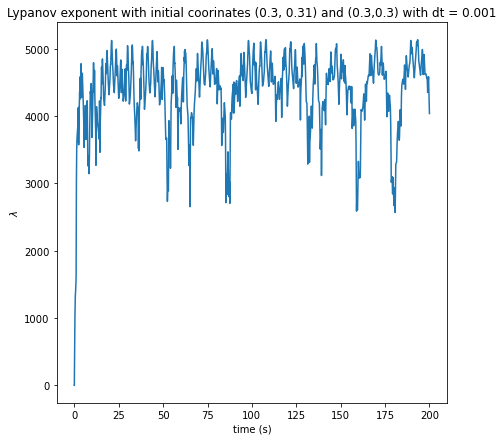

In [301]:
plt.figure(figsize = (7,7))
lypanovExponent2(0.3,0.31, 0.3, 0.3, 0.5, 0.5, 200, 0.001)
plt.xlabel('time (s)')
plt.ylabel('$\lambda$')
plt.title('Lypanov exponent with initial coorinates (0.3, 0.31) and (0.3,0.3) with dt = 0.001')

Text(0.5, 1.0, 'Lypanov exponent with initial coorinates (0, 0.31) and (0,0,3) with dt = 0.001')

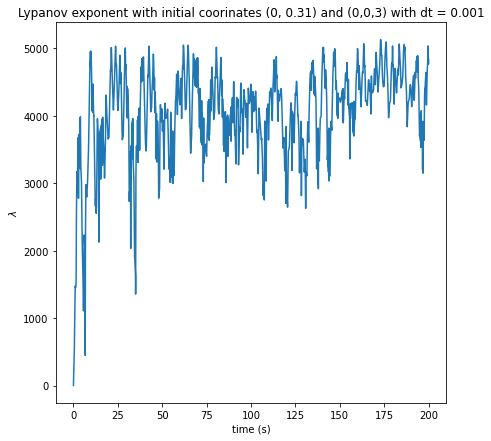

In [302]:
plt.figure(figsize = (7,7))
lypanovExponent2(0,0.31, 0, 0.3, 0.5, 0.5, 200, 0.001)
plt.xlabel('time (s)')
plt.ylabel('$\lambda$')
plt.title('Lypanov exponent with initial coorinates (0, 0.31) and (0,0,3) with dt = 0.001')

Changing the time step to be larger greatly reduces the Lypanov exponent. It is unsure why this is but different initial conditions will converge to the same value regardless. Another interesting value is that most lypanov plots follow similarly to plots 2-4 above, plot 1 is the exception where the trend is much more gradual. This may be due to starting close to one of the centres of the blinking vortex. Below is a lypanov plot with a larger time step (0.005 instead of 0.001).

Text(0.5, 1.0, 'Lypanov exponent with initial coorinates (0, 0.31) and (0,0.3) with dt = 0.005')

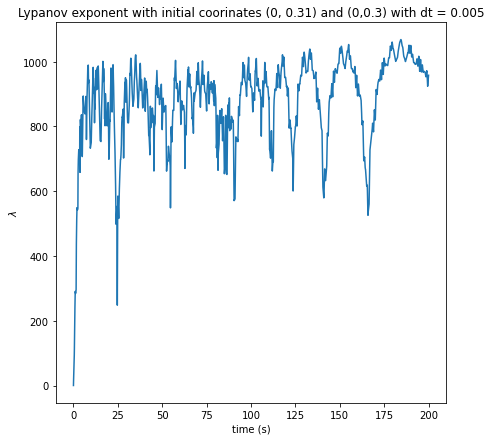

In [303]:
plt.figure(figsize = (7,7))
lypanovExponent2(0,0.31, 0, 0.3, 0.5, 0.5, 200, 0.005)
plt.xlabel('time (s)')
plt.ylabel('$\lambda$')
plt.title('Lypanov exponent with initial coorinates (0, 0.31) and (0,0.3) with dt = 0.005')

As can be seen, the lypanov can be dependent on the size of the time step but overall the lypanov exponent converges. It would be better to do a longer iteration to get a better mean value as lambda varies wildly